<a href="https://colab.research.google.com/github/carlosarturoceron/dataKids/blob/main/hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## El "Hola Mundo" del Aprendizaje Profundo con Redes Neuronales
---

source: https://github.com/https-deeplearning-ai/tensorflow-1-public

Como en toda primera aplicación, deberías comenzar con algo súper simple que muestre la estructura general de cómo funciona tu código. En el caso de crear redes neuronales, un caso simple es cuando aprende la relación entre dos números.

Por ejemplo considera el siguiente conjunto de datos x,y

In [11]:
### Los datos
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

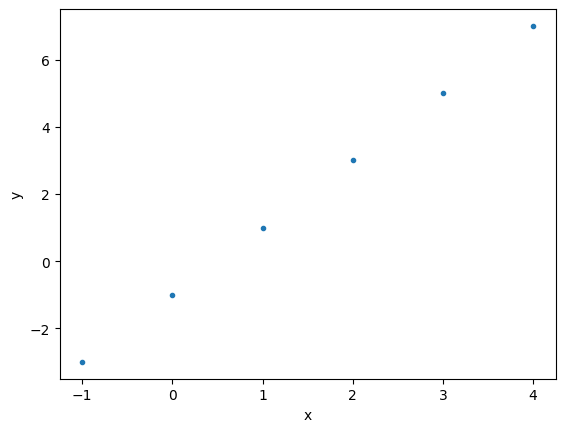

In [12]:
# prompt: make a plot of xs,ys

plt.plot(xs, ys, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Nota qué y = 2x - 1

Si estuvieras escribiendo código para una función como esta, ya conoces las 'reglas':

In [21]:
def predecir(x):
    y = (2 * x) - 1
    return y

In [22]:
predecir(5)

9


Entonces, ¿cómo entrenarías una red neuronal para hacer la tarea equivalente? ¡Usando datos! Al alimentarla con un conjunto de x's e y's, debería ser capaz de descubrir la relación entre ellos.

Obviamente, este es un paradigma muy diferente al que podrías estar acostumbrado. Así que vamos a analizarlo paso a paso.

### Define y compila la Red Neuronal

A continuación, crearás la red neuronal más simple posible. Tiene 1 capa con 1 neurona, y la forma de entrada es solo 1 valor. Construirás este modelo usando la clase [Sequential](https://keras.io/api/models/sequential/) de Keras, que te permite definir la red como una secuencia de [capas](https://keras.io/api/layers/). Puedes usar una única capa [Dense](https://keras.io/api/layers/core_layers/dense/) para construir esta red simple como se muestra a continuación.


In [14]:
# Crea la red neuronal más simple.
# 1 capa, 1 neurona, con tamaño de entrada 1
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Ahora, compilarás la red neuronal. Cuando lo hagas, tendrás que especificar 2 funciones: una función de [pérdida](https://keras.io/api/losses/) y un [optimizador](https://keras.io/api/optimizers/).

Si has visto mucha matemática para el aprendizaje automático, aquí es donde suele usarse. Pero en este caso, está encapsulado de forma clara en funciones y clases para ti. ¿Pero qué sucede aquí? Explicaremos...

Sabes que en la función declarada al principio de este cuaderno, la relación entre los números es `y=2x-1`. Cuando la computadora intenta 'aprender' eso, hace una suposición... tal vez `y=10x+10`. La función de `pérdida` mide las respuestas supuestas con respecto a las respuestas correctas conocidas y mide qué tan bien o qué tan mal lo hizo.

Luego usa la función `optimizador` para hacer otra suposición. Basándose en cómo fue la función de pérdida, intentará minimizar la pérdida. En ese momento, quizás llegue a algo como `y=5x+5`, que, aunque sigue siendo bastante malo, está más cerca del resultado correcto (es decir, la pérdida es menor).

Repetirá esto durante el número de _épocas_ que verás en breve. Pero primero, aquí te explicamos cómo le dirás que use [error cuadrático medio](https://keras.io/api/losses/regression_losses/#meansquarederror-function) para la pérdida y [descenso de gradiente estocástico](https://keras.io/api/optimizers/sgd/) para el optimizador. ¡No necesitas entender la matemática de estos todavía, pero puedes ver que funcionan!

Con el tiempo, aprenderás las diferentes funciones de pérdida y optimización apropiadas para diferentes escenarios.


In [15]:
model.compile(optimizer='sgd', loss='mean_squared_error')

Entrenar la red

In [28]:
model.fit(xs,ys, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 36ms/step - loss: 0.0756
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 0.0741
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 0.0726
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 0.0711
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 0.0696


### Predict
---
Anota el número de épocas vs la predicción

In [29]:
model.predict([10])

1/1 [==============================] - 0s 116ms/step


array([[18.23028]], dtype=float32)

### Recapitulando
---

Importar Librerias

In [26]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.15.0


Construir la red

In [27]:
model2 = tf.keras.Sequential(keras.layers.Dense(units=1, input_shape = [1]))

Compilar (la funcion de activation y de error)

In [30]:
model2.compile(optimizer='sgd', loss='mean_squared_error')

Alimentar los datos

In [31]:
xs2 = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys2 = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

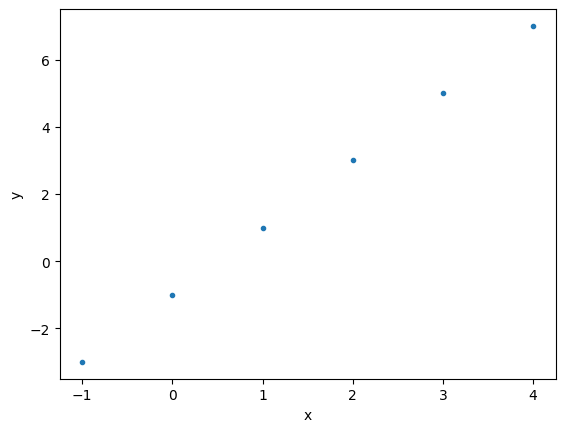

In [40]:
# prompt: make a plot of xs2, ys2

plt.plot(xs2, ys2, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Entrenar

In [32]:
model2.fit(xs2, ys2, epochs=500, verbose=False)

Predecir

In [71]:
model2.predict([10])

1/1 [==============================] - 0s 35ms/step


array([[18.980473]], dtype=float32)

### Explorando la convergencia del perceptron

In [34]:
import matplotlib.pyplot as plt

In [67]:
n_epochs = []
y_pred = []

for epochs in range(1,100):
    model3 = tf.keras.Sequential(
        keras.layers.Dense(units=1, input_shape = [1])
        )
    model3.compile(optimizer='sgd', loss='mean_squared_error')
    model3.fit(xs, ys, epochs=epochs, verbose=0)
    n_epochs.append(epochs)
    y_pred.append(model3.predict([10], verbose=0)[0][0])

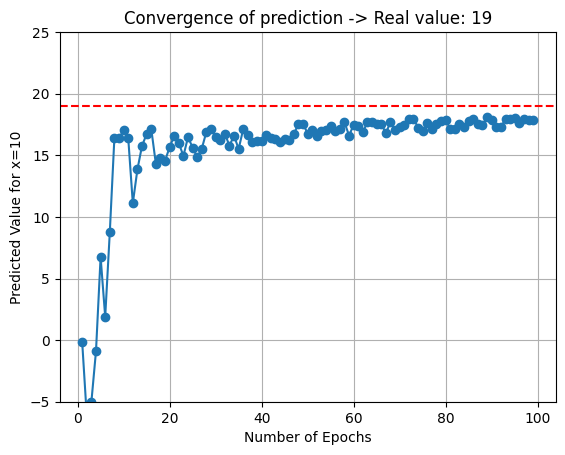

In [68]:
# Plotting n_epochs vs y_pred
plt.plot(n_epochs, y_pred, marker='o', linestyle='-')
plt.axhline(y=19, color='red', linestyle='--', label='Horizontal Line at y=19')
plt.plot()
plt.xlabel('Number of Epochs')
plt.ylabel('Predicted Value for x=10')
plt.title('Convergence of prediction -> Real value: 19')

# Set the y-axis limits to go up to 20
plt.ylim(-5, 25)

plt.grid(True)
plt.show()

In [70]:
model3.predict([10])

1/1 [==============================] - 0s 38ms/step


array([[17.83247]], dtype=float32)